## DATA LOADING AND PREPROCESSING

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_2020 = pd.read_excel("C:/Users/KARRA VIVEK REDDY/OneDrive/Documents/DATA-5100/2020_smd_hourly.xlsx",sheet_name="NH")
df_2021 = pd.read_excel("C:/Users/KARRA VIVEK REDDY/OneDrive/Documents/DATA-5100/2021_smd_hourly.xlsx",sheet_name="NH")
df_2022 = pd.read_excel("C:/Users/KARRA VIVEK REDDY/OneDrive/Documents/DATA-5100/2022_smd_hourly.xlsx",sheet_name="NH")

In [3]:
df = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)
df

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,2020-01-01,1,1045.2,1080.184,23.66,23.54,0.02,0.10,23.41,23.21,0.0,0.20,32,30
1,2020-01-01,2,1022.0,1034.726,18.84,18.75,0.02,0.07,18.65,18.54,0.0,0.11,34,27
2,2020-01-01,3,952.7,1005.343,16.68,16.67,0.01,0.00,17.73,17.65,0.0,0.08,34,26
3,2020-01-01,4,967.2,1000.609,16.57,16.55,0.01,0.01,17.24,17.16,0.0,0.08,33,24
4,2020-01-01,5,961.8,1011.067,15.62,15.61,0.01,0.00,17.19,17.11,0.0,0.08,31,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2022-12-31,20,1241.5,1282.789,39.04,38.97,0.00,0.07,26.38,26.27,0.0,0.11,52,48
26300,2022-12-31,21,1194.0,1219.789,38.91,38.88,0.00,0.03,25.33,25.31,0.0,0.02,50,48
26301,2022-12-31,22,1127.4,1158.510,38.70,38.73,0.00,-0.03,31.70,31.69,0.0,0.01,46,45
26302,2022-12-31,23,994.0,1092.783,38.79,38.69,0.00,0.10,44.15,44.16,0.0,-0.01,45,44


In [4]:
df.shape

(26304, 14)

In [5]:
df.isnull().sum()

Date         0
Hr_End       0
DA_Demand    0
RT_Demand    0
DA_LMP       0
DA_EC        0
DA_CC        0
DA_MLC       0
RT_LMP       0
RT_EC        0
RT_CC        0
RT_MLC       0
Dry_Bulb     0
Dew_Point    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       26304 non-null  datetime64[ns]
 1   Hr_End     26304 non-null  int64         
 2   DA_Demand  26304 non-null  float64       
 3   RT_Demand  26304 non-null  float64       
 4   DA_LMP     26304 non-null  float64       
 5   DA_EC      26304 non-null  float64       
 6   DA_CC      26304 non-null  float64       
 7   DA_MLC     26304 non-null  float64       
 8   RT_LMP     26304 non-null  float64       
 9   RT_EC      26304 non-null  float64       
 10  RT_CC      26304 non-null  float64       
 11  RT_MLC     26304 non-null  float64       
 12  Dry_Bulb   26304 non-null  int64         
 13  Dew_Point  26304 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 2.8 MB


In [7]:
from datetime import date
import calendar

df['DAY_OF_WEEK'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point,DAY_OF_WEEK
0,2020-01-01,1,1045.2,1080.184,23.66,23.54,0.02,0.10,23.41,23.21,0.0,0.20,32,30,Wednesday
1,2020-01-01,2,1022.0,1034.726,18.84,18.75,0.02,0.07,18.65,18.54,0.0,0.11,34,27,Wednesday
2,2020-01-01,3,952.7,1005.343,16.68,16.67,0.01,0.00,17.73,17.65,0.0,0.08,34,26,Wednesday
3,2020-01-01,4,967.2,1000.609,16.57,16.55,0.01,0.01,17.24,17.16,0.0,0.08,33,24,Wednesday
4,2020-01-01,5,961.8,1011.067,15.62,15.61,0.01,0.00,17.19,17.11,0.0,0.08,31,24,Wednesday


In [8]:
df['Dry_Bulb_square'] = df['Dry_Bulb']**2
df['Dew_Point_square'] = df['Dew_Point']**2
df['Dry_Dew_Interaction'] = df['Dry_Bulb'] * df['Dew_Point']

In [9]:
df

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point,DAY_OF_WEEK,Dry_Bulb_square,Dew_Point_square,Dry_Dew_Interaction
0,2020-01-01,1,1045.2,1080.184,23.66,23.54,0.02,0.10,23.41,23.21,0.0,0.20,32,30,Wednesday,1024,900,960
1,2020-01-01,2,1022.0,1034.726,18.84,18.75,0.02,0.07,18.65,18.54,0.0,0.11,34,27,Wednesday,1156,729,918
2,2020-01-01,3,952.7,1005.343,16.68,16.67,0.01,0.00,17.73,17.65,0.0,0.08,34,26,Wednesday,1156,676,884
3,2020-01-01,4,967.2,1000.609,16.57,16.55,0.01,0.01,17.24,17.16,0.0,0.08,33,24,Wednesday,1089,576,792
4,2020-01-01,5,961.8,1011.067,15.62,15.61,0.01,0.00,17.19,17.11,0.0,0.08,31,24,Wednesday,961,576,744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2022-12-31,20,1241.5,1282.789,39.04,38.97,0.00,0.07,26.38,26.27,0.0,0.11,52,48,Saturday,2704,2304,2496
26300,2022-12-31,21,1194.0,1219.789,38.91,38.88,0.00,0.03,25.33,25.31,0.0,0.02,50,48,Saturday,2500,2304,2400
26301,2022-12-31,22,1127.4,1158.510,38.70,38.73,0.00,-0.03,31.70,31.69,0.0,0.01,46,45,Saturday,2116,2025,2070
26302,2022-12-31,23,994.0,1092.783,38.79,38.69,0.00,0.10,44.15,44.16,0.0,-0.01,45,44,Saturday,2025,1936,1980


In [10]:
new_df = df.drop(['DA_Demand','DA_LMP','DA_EC','DA_CC','DA_MLC','RT_LMP','RT_EC','RT_CC','RT_MLC'],axis=1)
new_df

,Date,Hr_End,RT_Demand,Dry_Bulb,Dew_Point,DAY_OF_WEEK,Dry_Bulb_square,Dew_Point_square,Dry_Dew_Interaction
0,2020-01-01,1,1080.184,32,30,Wednesday,1024,900,960
1,2020-01-01,2,1034.726,34,27,Wednesday,1156,729,918
2,2020-01-01,3,1005.343,34,26,Wednesday,1156,676,884
3,2020-01-01,4,1000.609,33,24,Wednesday,1089,576,792
4,2020-01-01,5,1011.067,31,24,Wednesday,961,576,744
...,...,...,...,...,...,...,...,...,...
26299,2022-12-31,20,1282.789,52,48,Saturday,2704,2304,2496
26300,2022-12-31,21,1219.789,50,48,Saturday,2500,2304,2400
26301,2022-12-31,22,1158.510,46,45,Saturday,2116,2025,2070
26302,2022-12-31,23,1092.783,45,44,Saturday,2025,1936,1980


In [11]:
new_df.corr()

C:\Users\KARRA VIVEK REDDY\AppData\Local\Temp\ipykernel_16644\4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,Hr_End,RT_Demand,Dry_Bulb,Dew_Point,Dry_Bulb_square,Dew_Point_square,Dry_Dew_Interaction
Hr_End,1.000000,0.430536,0.174111,0.014014,0.181223,0.014309,0.086643
RT_Demand,0.430536,1.000000,0.252231,0.117376,0.378503,0.240710,0.314152
Dry_Bulb,0.174111,0.252231,1.000000,0.878223,0.975436,0.848833,0.933500
Dew_Point,0.014014,0.117376,0.878223,1.000000,0.835064,0.960131,0.947335
Dry_Bulb_square,0.181223,0.378503,0.975436,0.835064,1.000000,0.849163,0.945774
Dew_Point_square,0.014309,0.240710,0.848833,0.960131,0.849163,1.000000,0.972507
Dry_Dew_Interaction,0.086643,0.314152,0.933500,0.947335,0.945774,0.972507,1.000000


In [12]:
new_df.describe()

,Hr_End,RT_Demand,Dry_Bulb,Dew_Point,Dry_Bulb_square,Dew_Point_square,Dry_Dew_Interaction
count,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,12.500000,1295.402554,49.142716,37.410394,2802.189553,1788.029387,2179.055467
std,6.922318,262.760623,19.677341,19.710570,1970.175383,1456.277180,1642.703937
min,1.000000,769.478000,-9.000000,-19.000000,0.000000,0.000000,-273.000000
25%,6.750000,1110.889000,34.000000,23.000000,1156.000000,529.000000,777.000000
50%,12.500000,1276.953500,49.000000,37.000000,2401.000000,1369.000000,1764.000000
75%,18.250000,1449.707500,65.000000,55.000000,4225.000000,3025.000000,3540.000000
max,24.000000,2462.235000,97.000000,75.000000,9409.000000,5625.000000,6816.000000


# DATA VISUALIZATION

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

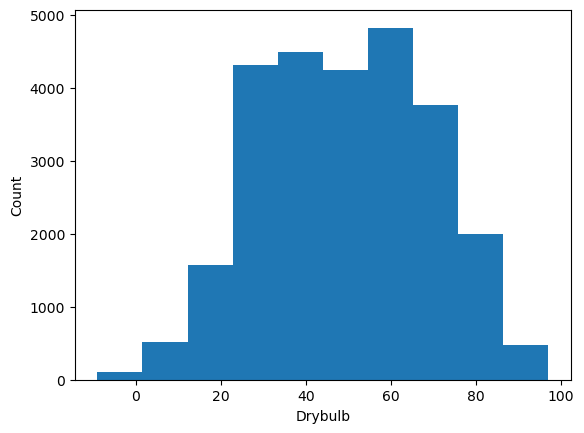

In [14]:
plt.hist(df['Dry_Bulb'])
plt.xlabel('Drybulb')
plt.ylabel('Count')
plt.show()

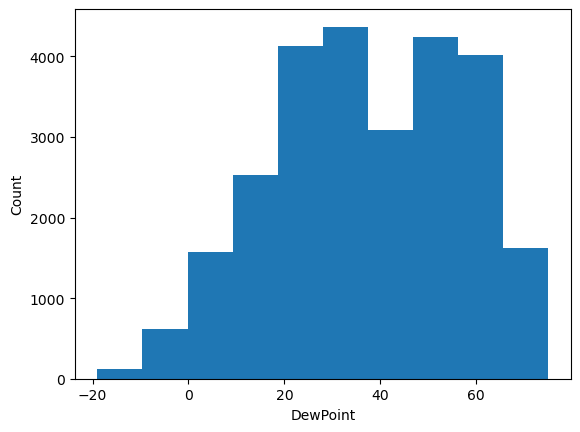

In [15]:
plt.hist(df['Dew_Point'])
plt.xlabel('DewPoint')
plt.ylabel('Count')
plt.show()

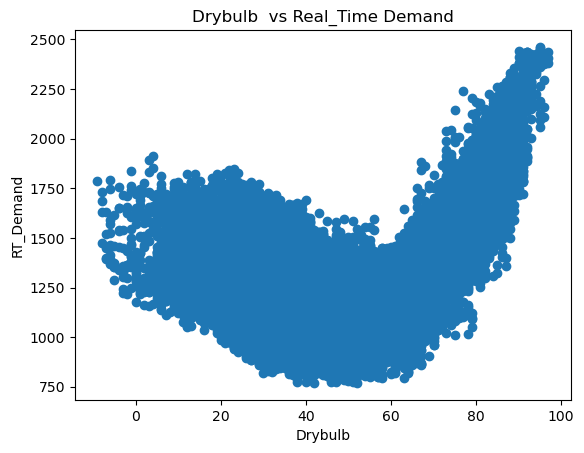

In [16]:
plt.scatter(df['Dry_Bulb'],df['RT_Demand'])
plt.title('Drybulb  vs Real_Time Demand')
plt.xlabel('Drybulb')
plt.ylabel('RT_Demand')
plt.show()

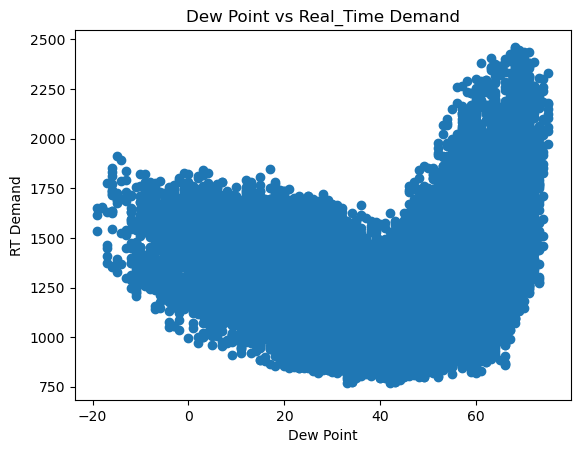

In [17]:
plt.scatter(df['Dew_Point'],df['RT_Demand'])
plt.title('Dew Point vs Real_Time Demand')
plt.xlabel('Dew Point')
plt.ylabel('RT Demand')

plt.show()

<Axes: xlabel='DAY_OF_WEEK', ylabel='RT_Demand'>

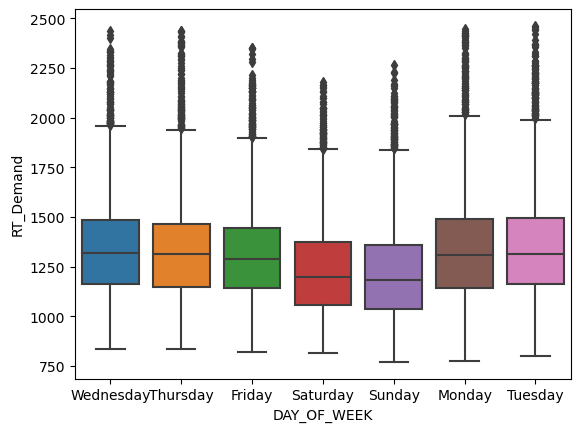

In [18]:
sns.boxplot(data=df, x="DAY_OF_WEEK", y="RT_Demand")

C:\Users\KARRA VIVEK REDDY\AppData\Local\Temp\ipykernel_16644\822199912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True)


<Axes: >

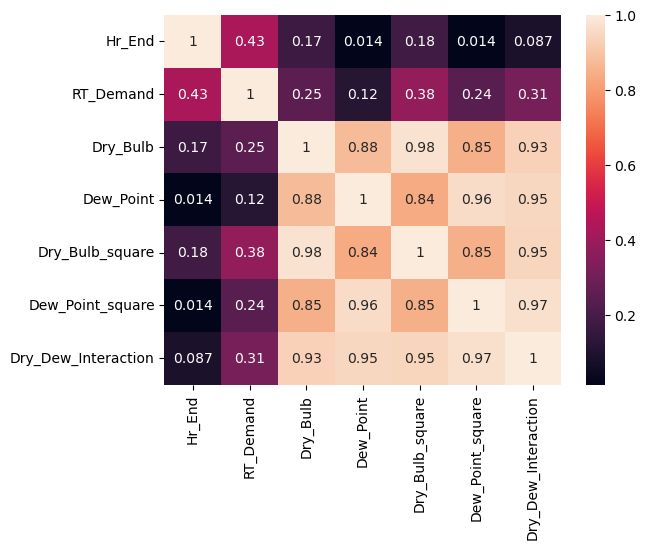

In [19]:
sns.heatmap(new_df.corr(), annot=True)

## MODEL DEVELOPMENT AND EVALUATION

In [20]:
dummies_df = pd.get_dummies(new_df, columns = ['DAY_OF_WEEK','Hr_End'],drop_first = True)

In [21]:
dummies_df.head()

,Date,RT_Demand,Dry_Bulb,Dew_Point,Dry_Bulb_square,Dew_Point_square,Dry_Dew_Interaction,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,...,Hr_End_15,Hr_End_16,Hr_End_17,Hr_End_18,Hr_End_19,Hr_End_20,Hr_End_21,Hr_End_22,Hr_End_23,Hr_End_24
0,2020-01-01,1080.184,32,30,1024,900,960,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-01,1034.726,34,27,1156,729,918,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-01,1005.343,34,26,1156,676,884,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-01,1000.609,33,24,1089,576,792,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-01,1011.067,31,24,961,576,744,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dummies_df.columns

Index(['Date', 'RT_Demand', 'Dry_Bulb', 'Dew_Point', 'Dry_Bulb_square',
       'Dew_Point_square', 'Dry_Dew_Interaction', 'DAY_OF_WEEK_Monday',
       'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday', 'DAY_OF_WEEK_Thursday',
       'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday', 'Hr_End_2', 'Hr_End_3',
       'Hr_End_4', 'Hr_End_5', 'Hr_End_6', 'Hr_End_7', 'Hr_End_8', 'Hr_End_9',
       'Hr_End_10', 'Hr_End_11', 'Hr_End_12', 'Hr_End_13', 'Hr_End_14',
       'Hr_End_15', 'Hr_End_16', 'Hr_End_17', 'Hr_End_18', 'Hr_End_19',
       'Hr_End_20', 'Hr_End_21', 'Hr_End_22', 'Hr_End_23', 'Hr_End_24'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = dummies_df[['Dry_Bulb', 'Dew_Point',
       'Dry_Bulb_square', 'Dew_Point_square', 'Dry_Dew_Interaction',
       'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday',
       'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday',
       'Hr_End_2', 'Hr_End_3', 'Hr_End_4', 'Hr_End_5', 'Hr_End_6', 'Hr_End_7',
       'Hr_End_8', 'Hr_End_9', 'Hr_End_10', 'Hr_End_11', 'Hr_End_12',
       'Hr_End_13', 'Hr_End_14', 'Hr_End_15', 'Hr_End_16', 'Hr_End_17',
       'Hr_End_18', 'Hr_End_19', 'Hr_End_20', 'Hr_End_21', 'Hr_End_22',
       'Hr_End_23', 'Hr_End_24']]
y = dummies_df['RT_Demand']


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19728, 34)
(19728,)
(6576, 34)
(6576,)


In [28]:
training = (dummies_df['Date'] < '2022-12-01')
val = (dummies_df['Date']>= '2022-12-01')

# Create training and validation sets
x_train_, y_train_ = x[training], y[training]
x_val, y_val = x[val], y[val]

In [29]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import learning_curve
import math

In [30]:
mod = []
header = ['Algorithm','MAE','MSE']

def model_test(model,name):
    model.fit(x_train.values, y_train)
    pred = model.predict(x_test.values)
    MAE = round(mae(y_test,pred),3)
    MSE = round(mse(y_test,pred),3)
    l1 = [name,MAE,MSE]
    mod.append(l1)
    print('MAE : ', MAE)
    print('MSE : ', MSE)

In [31]:
val_mod = []
head = ['Algorithm','MAE','MSE']

def model_valid(model_val,names):
    model_val.fit(x_train_.values, y_train_)
    y_pred_val = model_val.predict(x_val.values)
    MAE = round(mae(y_val,y_pred_val),3)
    MSE = round(mse(y_val,y_pred_val),3)
    l1 = [names,MAE,MSE]
    val_mod.append(l1)
    print('MAE : ', MAE)
    print('MSE : ', MSE)
    
    plt.scatter(y_val, y_pred_val)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
model_test(lr, 'Linear Regression')

MAE :  84.731
MSE :  11958.909


MAE :  91.96
MSE :  11723.304


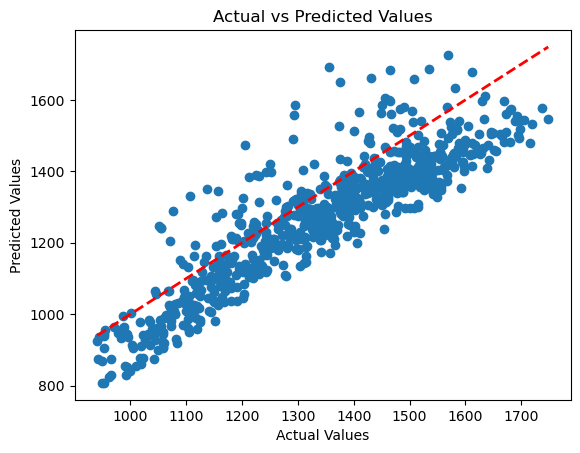

In [34]:

lr_model = LinearRegression()
model_valid(lr_model, 'Linear Regression')

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor(n_neighbors=5)
model_test(knn, 'KNeighbors Regressor')

MAE :  136.665
MSE :  29374.269


MAE :  174.243
MSE :  45372.845


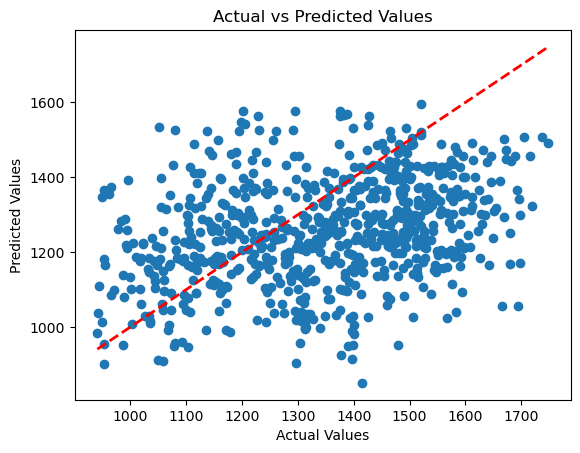

In [37]:
knn_model = KNeighborsRegressor(n_neighbors=5)
model_valid(knn_model, 'KNeighbors Regressor')

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dec_tree = DecisionTreeRegressor(random_state=12)
model_test(dec_tree, 'Decision Tree Regressor')

MAE :  78.787
MSE :  11526.473


MAE :  76.767
MSE :  10175.438


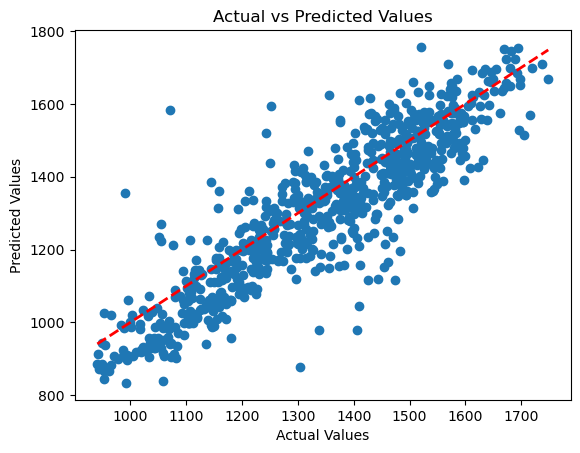

In [40]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=12)
model_valid(dt_model, 'Decision Tree Regressor')

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
ran_forest = RandomForestRegressor(random_state=12)
model_test(ran_forest, 'Random Forest Regressor')

MAE :  60.775
MSE :  6662.183


MAE :  63.21
MSE :  6244.522


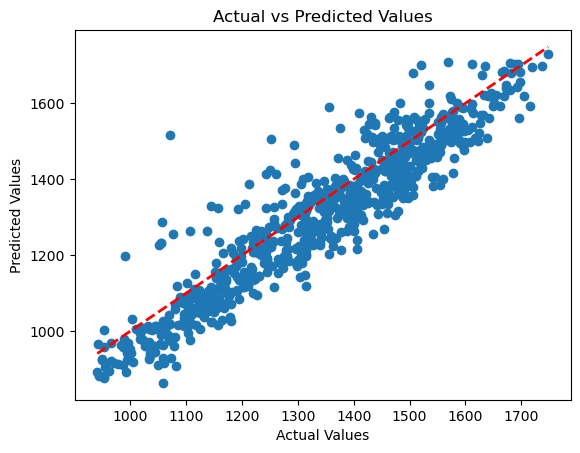

In [43]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=12)
model_valid(rf_model, 'Random Forest Regressor')

## RESULT

In [44]:
from tabulate import tabulate
print("Test evaluation set : \n ")
print(tabulate(mod, headers=header))

Test evaluation set : 
 
Algorithm                    MAE       MSE
-----------------------  -------  --------
Linear Regression         84.731  11958.9
KNeighbors Regressor     136.665  29374.3
Decision Tree Regressor   78.787  11526.5
Random Forest Regressor   60.775   6662.18


In [45]:
print("Validation evaluation set : \n")
print(tabulate(val_mod, headers=head))

Validation evaluation set : 

Algorithm                    MAE       MSE
-----------------------  -------  --------
Linear Regression         91.96   11723.3
KNeighbors Regressor     174.243  45372.8
Decision Tree Regressor   76.767  10175.4
Random Forest Regressor   63.21    6244.52
